# Introduction
### Problem Statement
#### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
#### They have contracted an automobile consulting company to understand the factors on which the pricing of a car depends. Specifically, they want to understand the factors affecting the pricing of cars in the American marketing, since those may be very different from the Chinese market. Essentially, the company wants to know:
#### • Which variables are significant in predicting the price of a car
#### • How well those variables describe the price of a car
#### • Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars
#### across the American market.


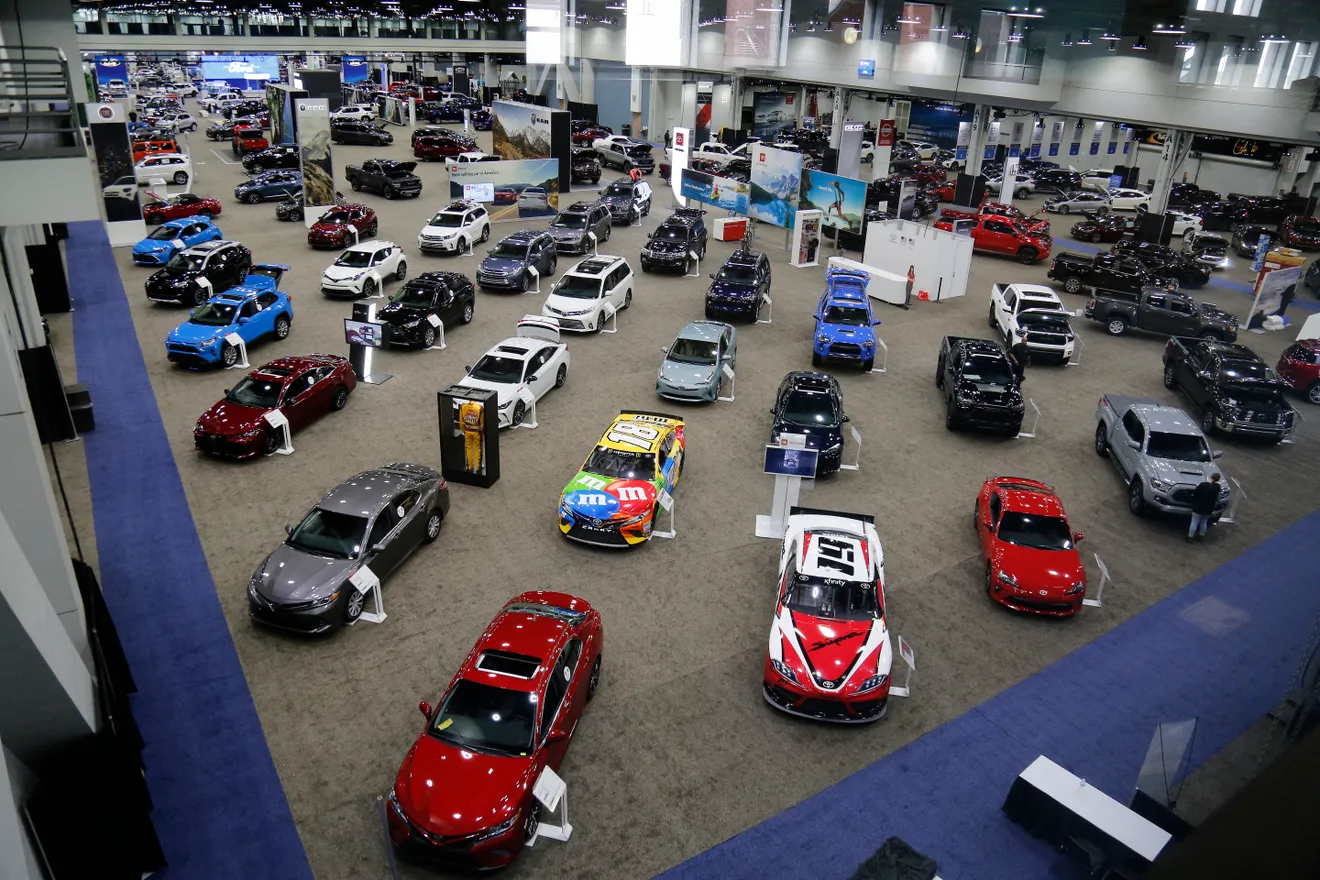

### Business Goal

#### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


### DATA DICTONARY


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from scipy.stats.stats import pearsonr
%matplotlib inline

/var/folders/gp/q35fhh7x7ld625zg0w3z4tkm0000gn/T/ipykernel_28530/2045198231.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [44]:
pd.set_option("display.max_columns", 50)

In [46]:
df = pd.read_csv("Arcadis/Python_CarPrice_Assignment.csv")

# Data Wrangling

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
df.sample(10)

car_ID  symboling                    CarName fueltype aspiration  \
85       86          1         mitsubishi montero      gas        std   
129     130          1            porsche cayenne      gas        std   
160     161          0              toyota corona      gas        std   
134     135          3                  saab 99le      gas        std   
199     200         -1               volvo diesel      gas      turbo   
88       89         -1       mitsubishi mirage g4      gas        std   
197     198         -1                  volvo 245      gas        std   
80       81          3       mitsubishi mirage g4      gas      turbo   
165     166          1  toyota celica gt liftback      gas        std   
192     193          0   volkswagen rabbit custom   diesel      turbo   

    doornumber    carbody drivewheel enginelocation  wheelbase  carlength  \
85        four      sedan        fwd          front       96.3      172.4   
129        two  hatchback        rwd          front       98.4      175.7   
160       four      sedan        fwd          front       95.7      166.3   
134        two  hatchback        fwd          front       99.1      186.6   
199       four      wagon        rwd          front      104.3      188.8   
88        four      sedan        fwd          front       96.3      172.4   
197       four      wagon        rwd          front      104.3      188.8   
80         two  hatchback        fwd          front       96.3      173.0   
165        two      sedan        rwd          front       94.5      168.7   
192       four      sedan        fwd          front      100.4      180.2   

     carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
85       65.4       51.6        2365        ohc           four         122   
129      72.3       50.5        3366      dohcv          eight         203   
160      64.4       53.0        2094        ohc           four          98   
134      66.5       56.1        2707        ohc           four         121   
199      67.2       57.5        3157        ohc           four         130   
88       65.4       51.6        2403        ohc           four         110   
197      67.2       57.5        3042        ohc           four         141   
80       65.4       49.4        2370        ohc           four         110   
165      64.0       52.6        2265       dohc           four          98   
192      66.9       55.1        2579        ohc           four          97   

    fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
85        2bbl       3.35    3.46               8.5          88     5000   
129       mpfi       3.94    3.11              10.0         288     5750   
160       2bbl       3.19    3.03               9.0          70     4800   
134       mpfi       2.54    2.07               9.3         110     5250   
199       mpfi       3.62    3.15               7.5         162     5100   
88        spdi       3.17    3.46               7.5         116     5500   
197       mpfi       3.78    3.15               9.5         114     5400   
80        spdi       3.17    3.46               7.5         116     5500   
165       mpfi       3.24    3.08               9.4         112     6600   
192        idi       3.01    3.40              23.0          68     4500   

     citympg  highwaympg    price  
85        25          32   6989.0  
129       17          28  31400.5  
160       38          47   7738.0  
134       21          28  15040.0  
199       17          22  18950.0  
88        23          30   9279.0  
197       24          28  16515.0  
80        23          30   9959.0  
165       26          29   9298.0  
192       33          38  13845.0

In [49]:
df["car_ID"].duplicated().sum()

0

In [50]:
df["car_company"] = df["CarName"].apply(lambda x:x.split(' ')[0])

In [51]:
df["car_company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Company names are Misspelled let fix them.

In [52]:
carname_correction = {"maxda":"mazda", "porcshce" : "porsche", "toyouta":"toyota", "Nissan" : "nissan",\
                      "vokswagen": "volkswagen", "vw" : "volkswagen"}

In [53]:
df["car_company"] = df["car_company"].apply(lambda x:carname_correction.get(x,x))

In [54]:
def numeric(x):
    return x.map({"four": 4, "two": 2})
df["doornumber"] = df[["doornumber"]].apply(numeric)


In [55]:
def number(x):
    return x.map({"four": 4, "six": 6, "five" : 5, "eight":8, "two" : 2, "three": 3, "twelve": 12})

df["cylindernumber"] = df[["cylindernumber"]].apply(number)

In [56]:
dtype_mapping = {"doornumber": int, "cylindernumber":int}
df[["cylindernumber", "doornumber"]] = df[["cylindernumber", "doornumber"]
                                         ].apply(lambda x:x.astype(dtype_mapping.get(
                                                                    x.name, x.dtypes)
                                                                  )
                                                )
df[["cylindernumber", "doornumber"]].head(5)

cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4

In [57]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 205    │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 27     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 8     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ car_ID                 │    0 │      0 │      100 │     59 │      1 │     52 │     150 │     200 │ ██████  │  │
│ │ symboling              │    0 │      0 │     0.83 │    1.2 │     -2 │      0 │       2 │       3 │  ▃█▆▄▃  │  │
│ │ doornumber             │    0 │      0 │      3.1 │   0.99 │      2 │      2 │       4 │       4 │ ▆    █  │  │
│ │ wheelbase              │    0 │      0 │       99 │      6 │     87 │     94 │     100 │     120 │  ▁█▄▂▁  │  │
│ │ carlength              │    0 │      0 │      170 │     12 │    140 │    170 │     180 │     210 │ ▁▃█▅▄▁  │  │
│ │ carwidth               │    0 │      0 │       66 │    2.1 │     60 │     64 │      67 │      72 │  ▇█▆▂▂  │  │
│ │ carheight              │    0 │      0 │       54 │    2.4 │     48 │     52 │      56 │      60 │ ▁▄▆█▃▁  │  │
│ │ curbweight             │    0 │      0 │     2600 │    520 │   1500 │   2100 │    2900 │    4100 │ ▂█▆▅▂▁  │  │
│ │ cylindernumber         │    0 │      0 │      4.4 │    1.1 │      2 │      4 │       4 │      12 │    █▁   │  │
│ │ enginesize             │    0 │      0 │      130 │     42 │     61 │     97 │     140 │     330 │  ▆█▃▁   │  │
│ │ boreratio              │    0 │      0 │      3.3 │   0.27 │    2.5 │    3.1 │     3.6 │     3.9 │  ▃█▇▆▂  │  │
│ │ stroke                 │    0 │      0 │      3.3 │   0.31 │    2.1 │    3.1 │     3.4 │     4.2 │  ▁▃█▂▁  │  │
│ │ compressionratio       │    0 │      0 │       10 │      4 │      7 │    8.6 │     9.4 │      23 │ █    ▁  │  │
│ │ horsepower             │    0 │      0 │      100 │     40 │     48 │     70 │     120 │     290 │  ██▃▁   │  │
│ │ peakrpm                │    0 │      0 │     5100 │    480 │   4200 │   4800 │    5500 │    6600 │  ▃▅█▇▂  │  │
│ │ citympg                │    0 │      0 │       25 │    6.5 │     13 │     19 │      30 │      49 │  ▃█▅▃▁  │  │
│ │ highwaympg             │    0 │      0 │       31 │    6.9 │     16 │     25 │      34 │      54 │  ▂▇█▄▁  │  │
│ │ price                  │    0 │      0 │    13000 │   8000 │   5100 │   7800 │   17000 │   45000 │  █▄▁ ▁  │  │
│ └────────────────────────┴──────┴────────┴──────────┴────────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       

#### Generated report clearly shows there null percentage is 0% in dataset and describing dataset on various parameter like mean, quantiles and shape of and data profile

In [58]:
df = df.drop(columns = ["CarName","car_ID"], axis =  1)

In [59]:
numeric_col = df.select_dtypes(include = ["int64", "float64"])
numeric_col.head(1)

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0         111     5000       21          27  13495.0

<Figure size 4000x4000 with 0 Axes>

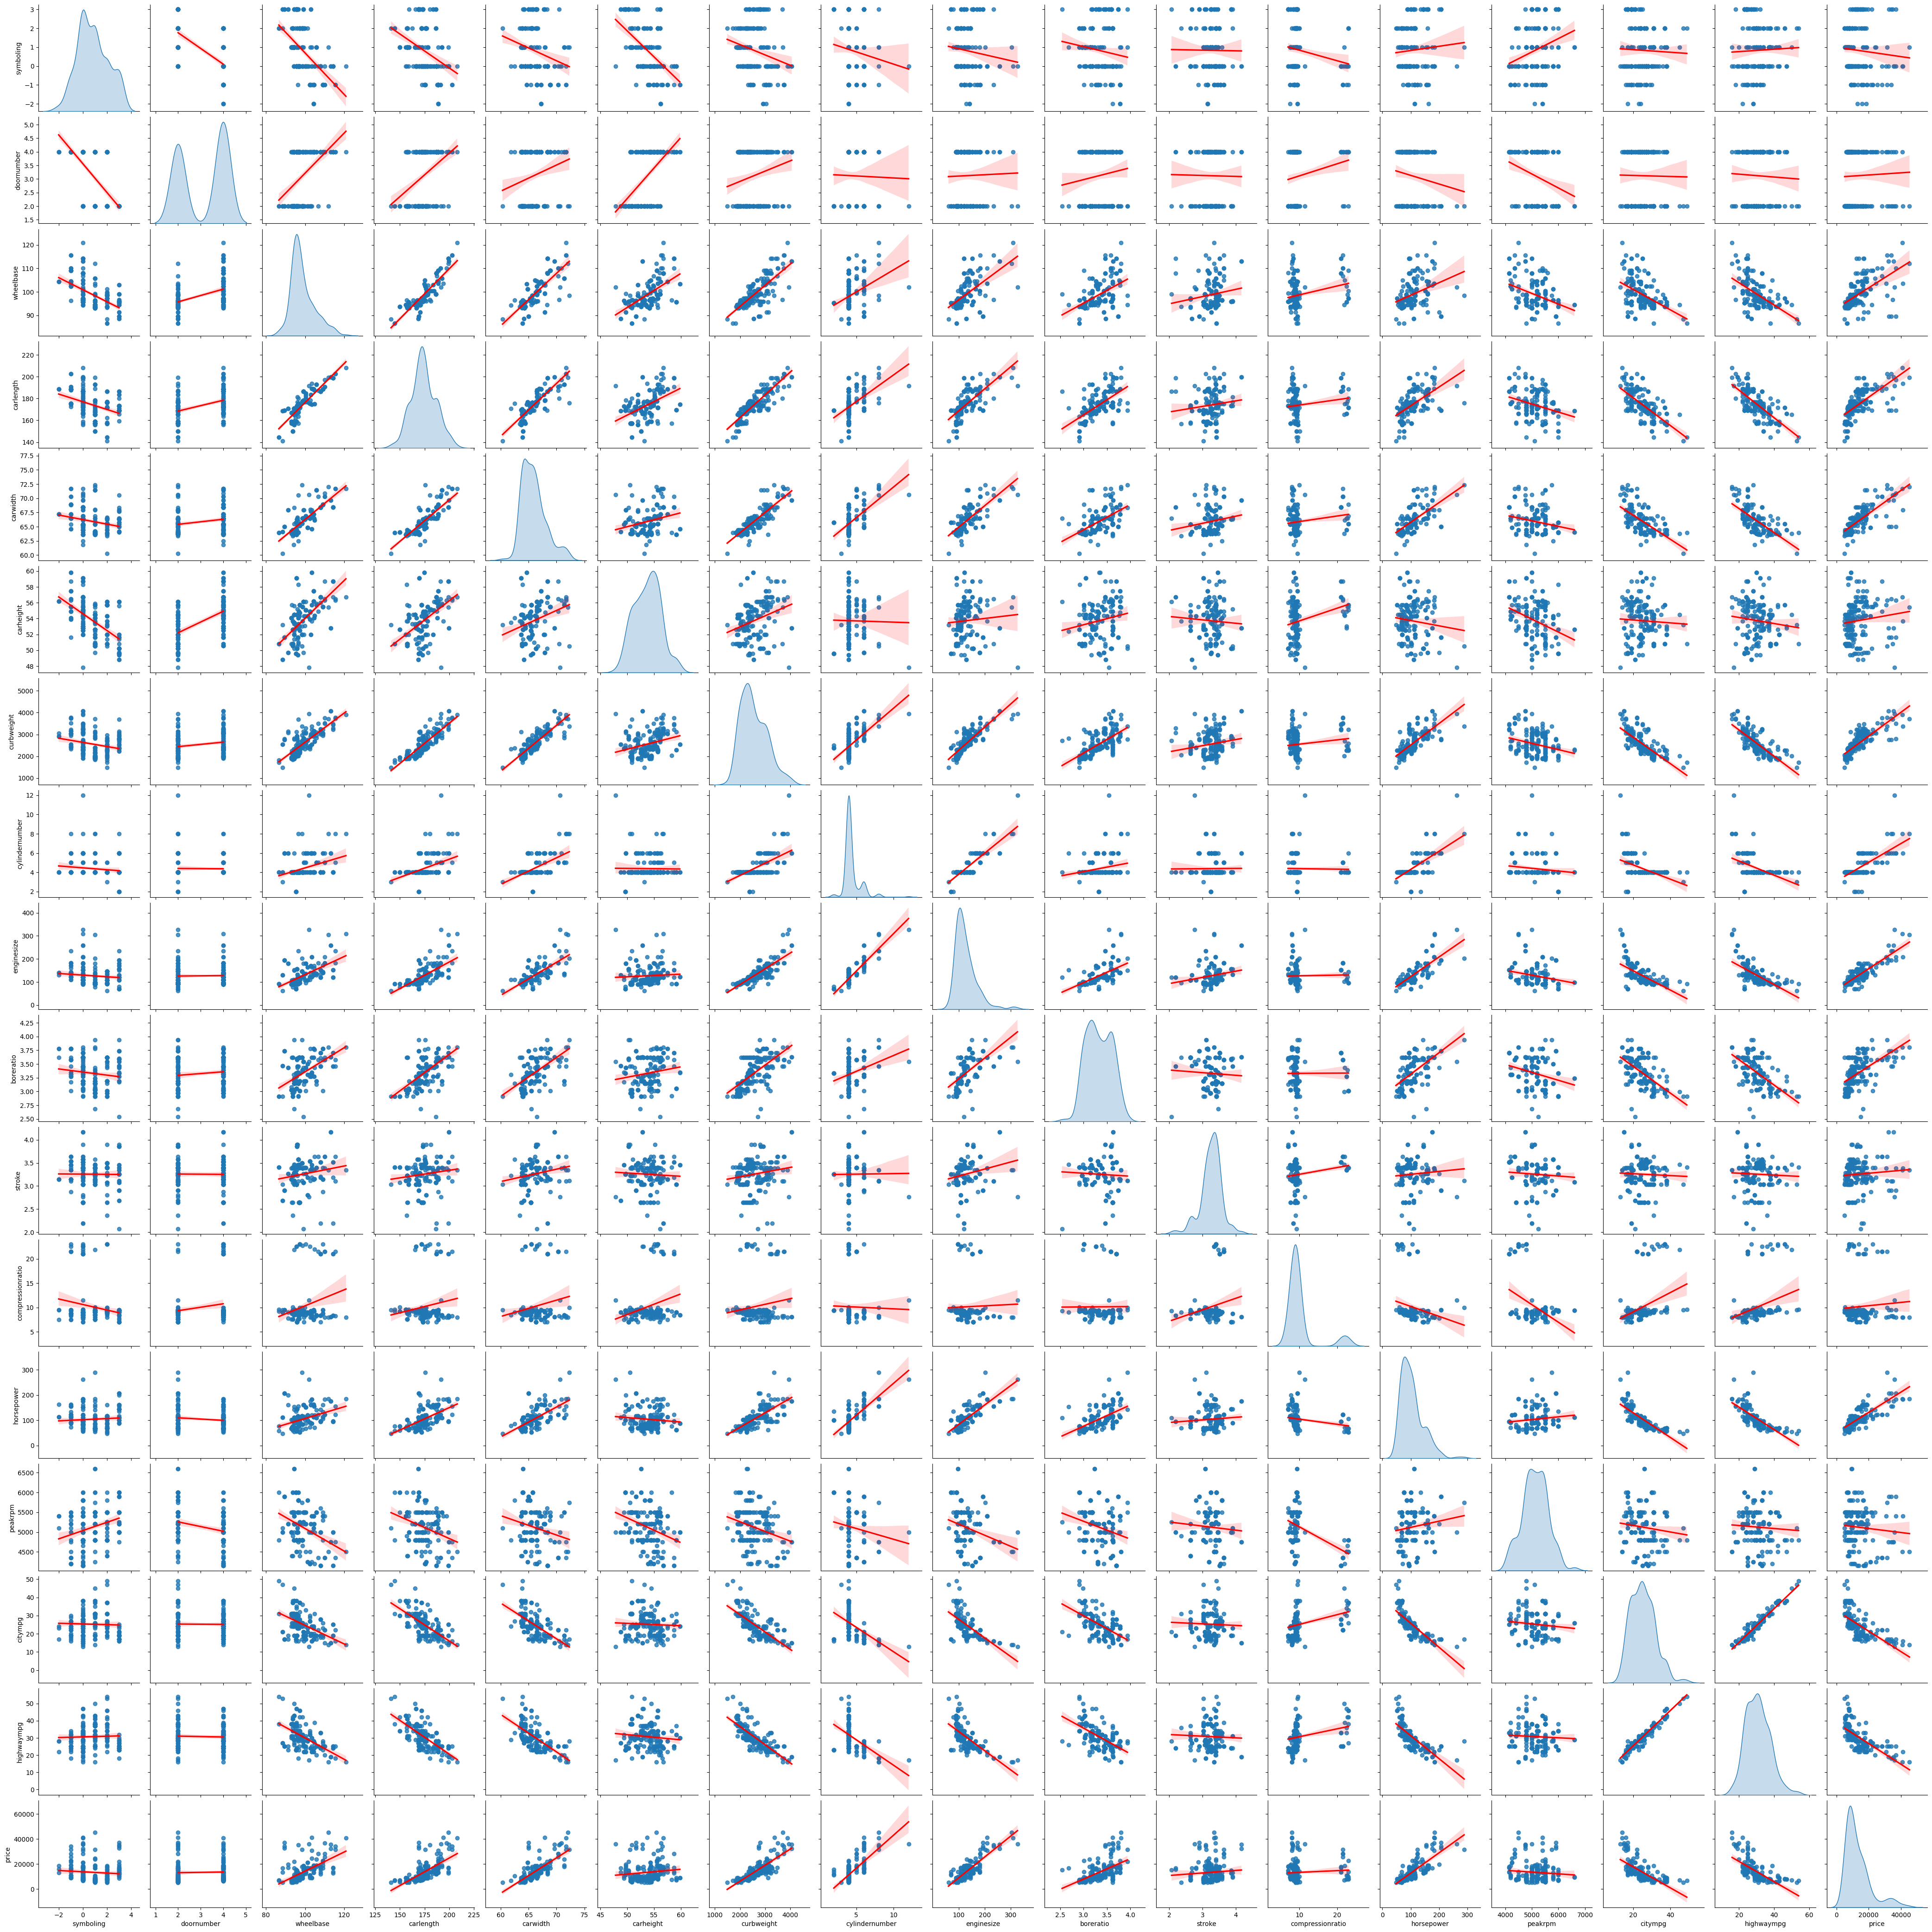

In [60]:
plt.figure(figsize=(40,40))
sns.pairplot(numeric_col, kind = "reg", diag_kind = "kde", plot_kws={"line_kws":{"color":"red"}})
plt.show()

#### Pairplot help to understand relationshipp between two variable, but since there are lots of column, so we will #### go for correlation matrix showing the correlation coeficients between and variables using heatmap.

## Correlation between Features using Heatmap

#### Matrix showing the correlation coeficients between and variables using heatmap. The Magnitude of correlation coefficient indicates the strength of the association, heigher the coefficient indicates higher positive association and vice versa

/var/folders/gp/q35fhh7x7ld625zg0w3z4tkm0000gn/T/ipykernel_28530/3735390830.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, cmap = "crest" )


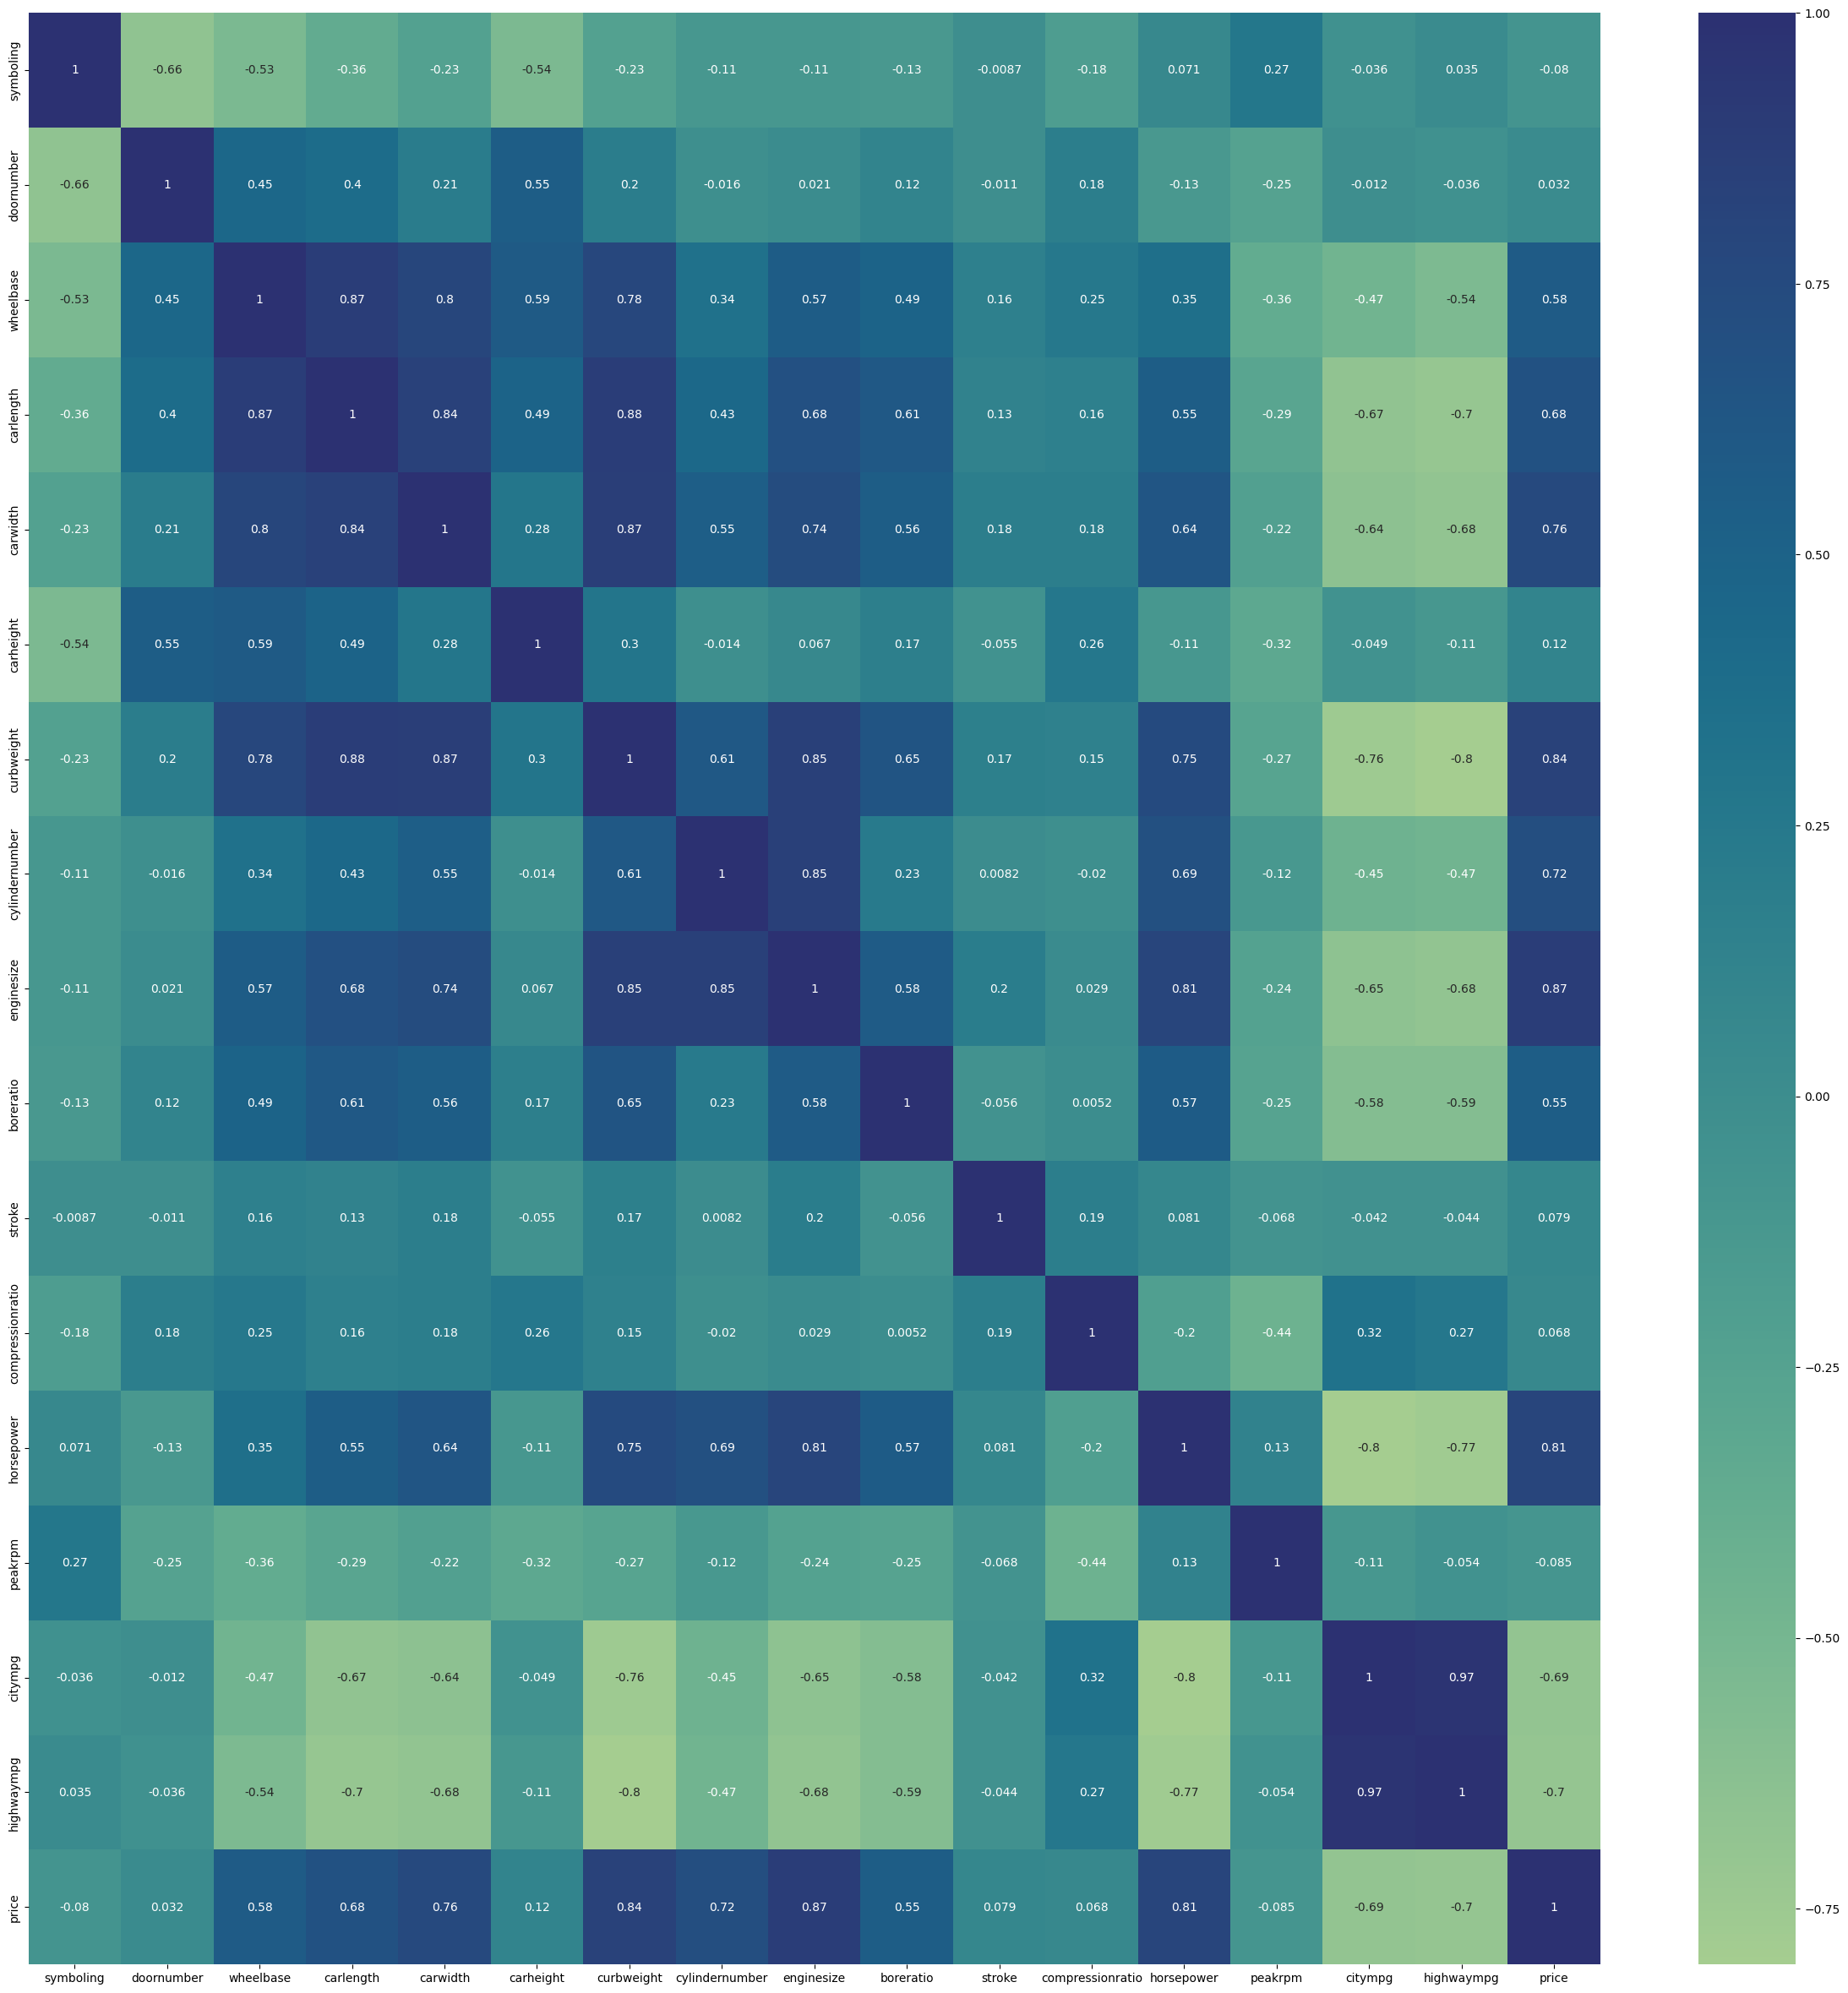

In [61]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot =True, cmap = "crest" )
plt.show()

#### Price is highly correlated with carlength, carwidth, wheelbase, enginesize, horsepower, curbweight, wheelbase, 
#### cylindernumber, stroke. while features symboling, highwaympg, citympg are negtively correlated. which means if a 
#### car have symboling which is -3 and considered to be more safe high price and expensive car have less milage for city and highway both.


### Model available from each company in US market.

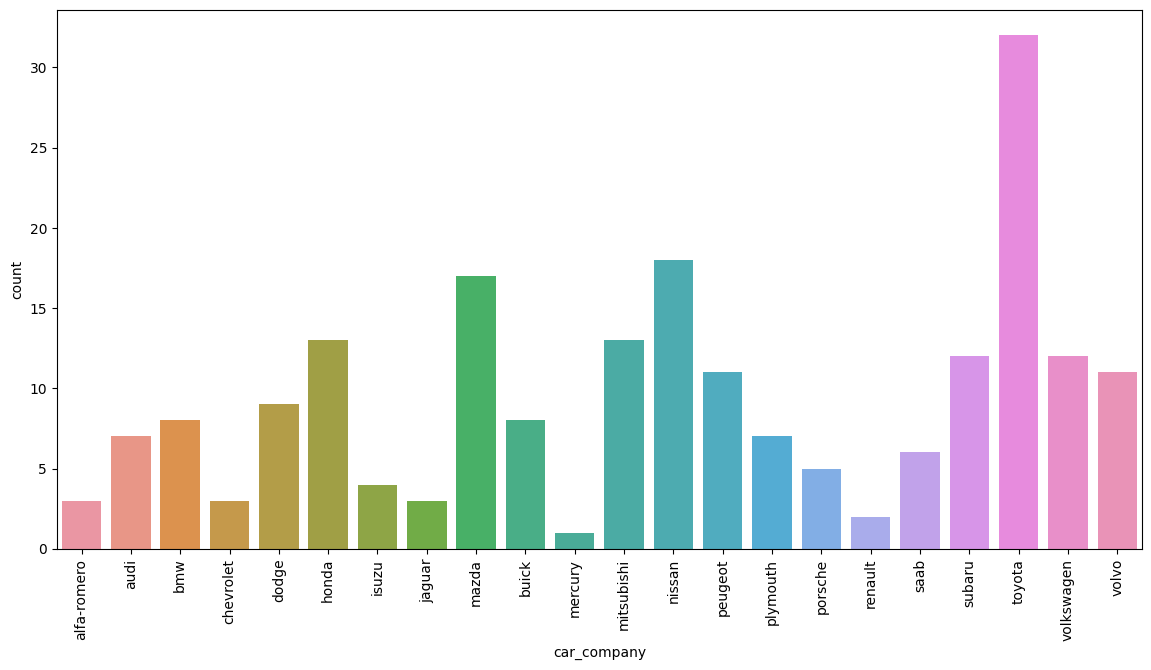

In [62]:
plt.figure(figsize = (14,7))
plt.xticks(rotation = 90)
sns.countplot(x = "car_company", data = df)
plt.show()

#### Toyota have highest number of model in market and mercury least

In [63]:
len(numeric_col.columns)

17

## Analysis of correlated features against car prices and their shares in US vehicle market.

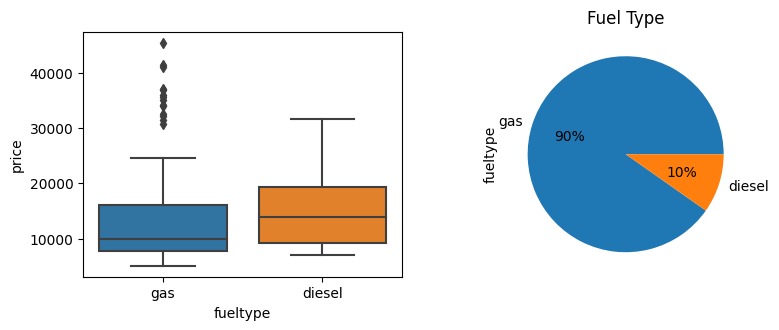

In [64]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "fueltype", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Fuel Type")
df["fueltype"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### The median price of diesel car is more than gas price which clearly indicates diesel cars are expensive and company
#### sold more gas car as than diesel car in US .

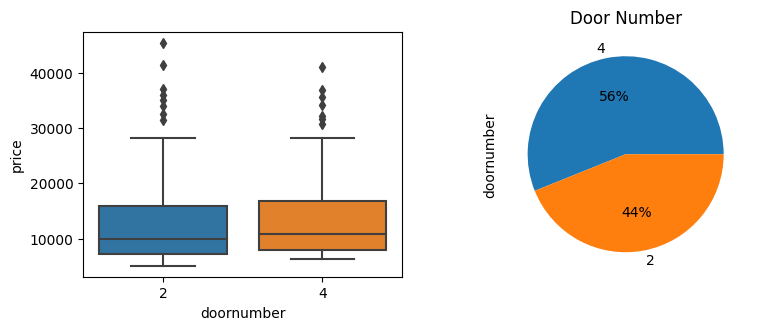

In [65]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "doornumber", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Door Number")
df["doornumber"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### Major market shares of car goes to having Four doors however prices are almost same.

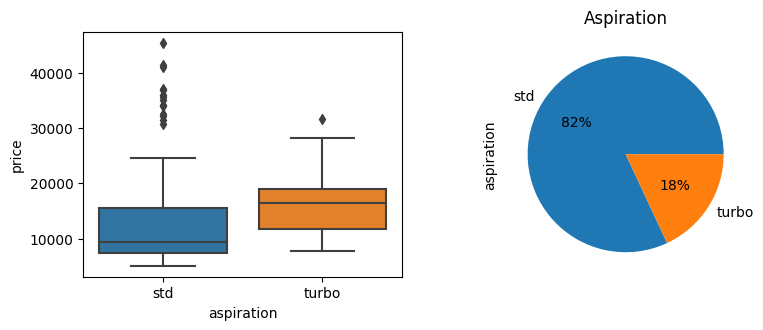

In [66]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "aspiration", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Aspiration")
df["aspiration"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### Median price of turbo aspiration car is higher than standard, and vehicle have more standard
#### aspiration as compared to turbo.

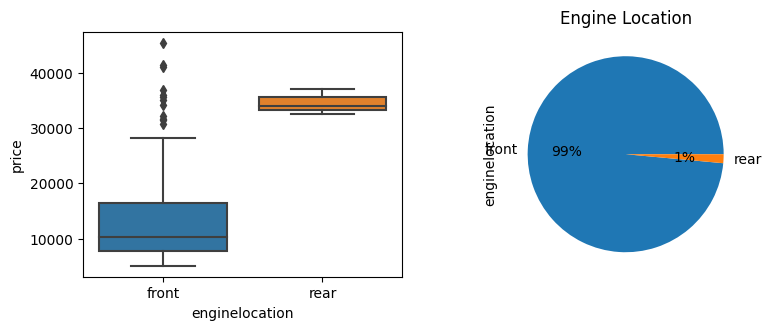

In [67]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "enginelocation", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Engine Location")
df["enginelocation"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### There are only 1 % of car with rear engine location and these car very expensive than front engine cars, so
#### company sell more.

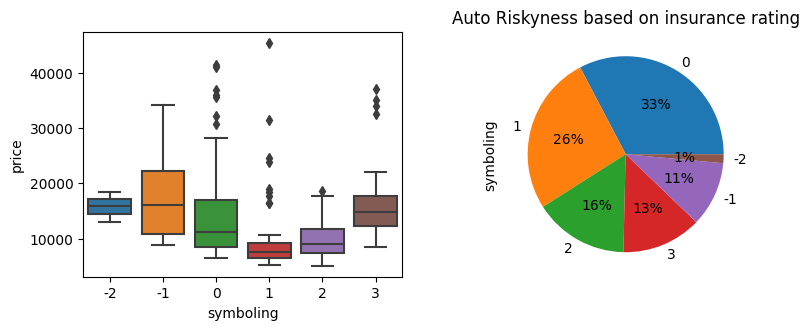

In [68]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "symboling", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Auto Riskyness based on insurance rating")
df["symboling"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### Majority of car in US have a risk rating on score of 0, 1 and car with these two rating have low prices

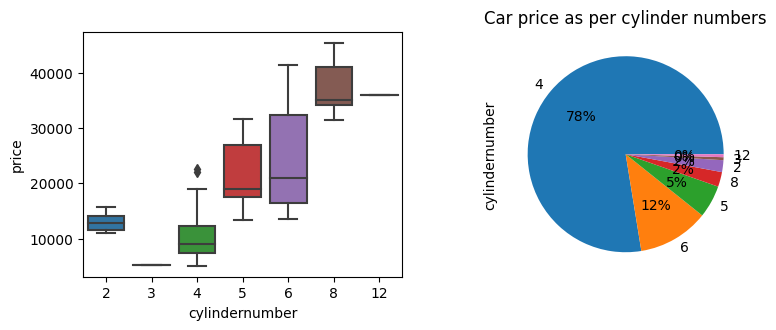

In [69]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "cylindernumber", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Car price as per cylinder numbers")
df["cylindernumber"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### Majority of car have 4 cylinder and price of cars are higher as per number of cylinder in car, car with more #### cylindernumber are expensive, hence cylinder number and prices have positive relation.

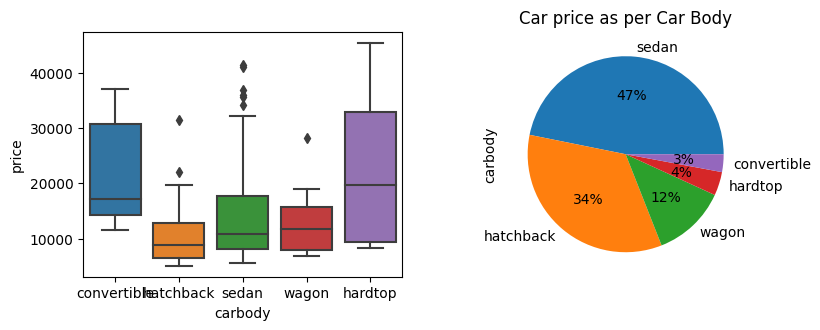

In [70]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "carbody", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Car price as per Car Body")
df["carbody"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### Major market contributed from sedan and hatchback, sedan and hatchback price are lower than hardtop and convertible. 

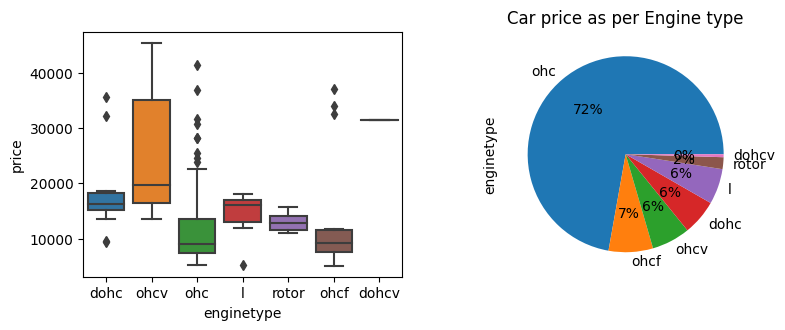

In [71]:
plt.figure(figsize = (14,7))

plt.subplot(2,3,1)
sns.boxplot(x = "enginetype", y = "price", data = df)

plt.subplot(2,3,2)
plt.title("Car price as per Engine type")
df["enginetype"].value_counts().plot(kind = "pie", fontsize = 10, autopct = "%1.0f%%")
plt.show()

#### US vehicle market have majority of vehile having ohc engine and their price are low as compared to others of engine type except ohcf.

correlation coefficient between price and citymppg : -68.57513360270401 %

correlation coefficient between price and highwaympg : -69.75990916465564 %


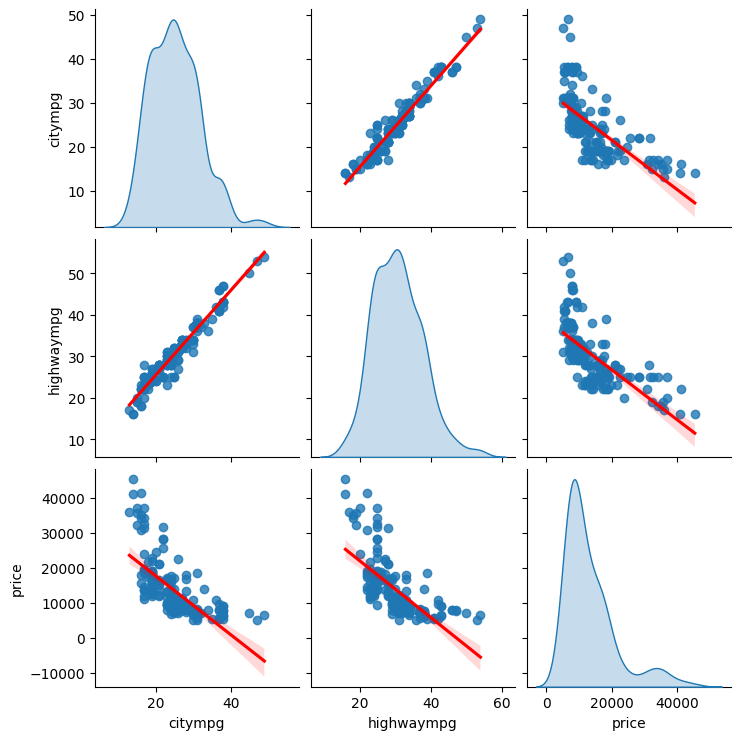

In [72]:
mileage = ["citympg", "highwaympg", "price"]
sns.pairplot(df[mileage],kind = "reg", diag_kind = "kde", plot_kws={"line_kws":{"color":"red"}})
pearson_coeff, p_value = pearsonr(df["citympg"], df["price"])
print("correlation coefficient between price and citymppg :",pearson_coeff*100,"%" )
pearson_coeff, p_value = pearsonr(df["highwaympg"], df["price"])
print("\ncorrelation coefficient between price and highwaympg :", pearson_coeff*100,"%" )

#### Expensive car have low mileage both in city an highways, there is a negative relation betweem MPG and Car prices.

# Engine size analysis

<Axes: title={'center': 'Top repeated Engine Size in Cars'}, xlabel='enginesize', ylabel='Count of enginesize in cars'>

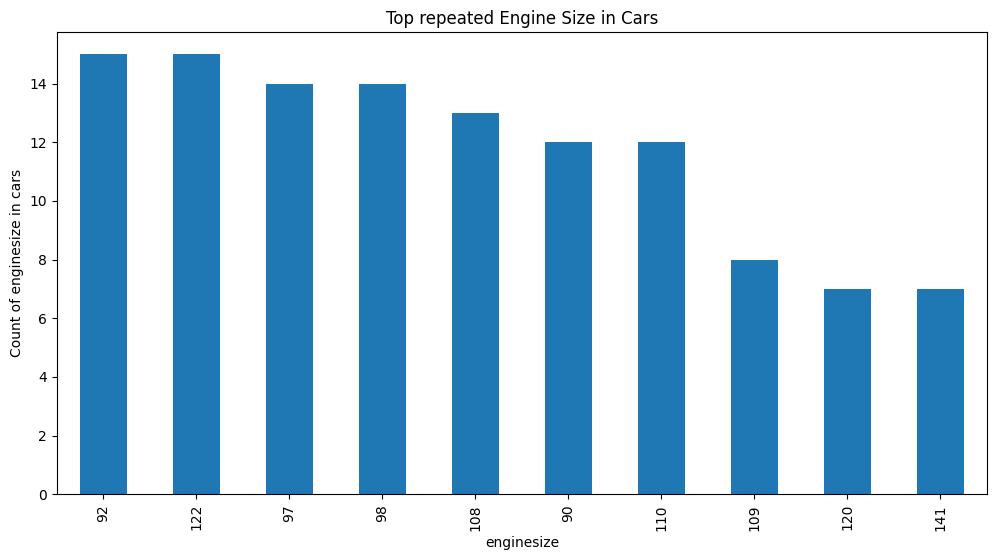

In [73]:
df.groupby("enginesize")["car_company"].count().sort_values(ascending =False).head(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Count of enginesize in cars",\
                                                title = "Top repeated Engine Size in Cars")

<Axes: title={'center': 'Top expenses Cars as per engine Size'}, xlabel='enginesize', ylabel='Average price of enginesize in cars'>

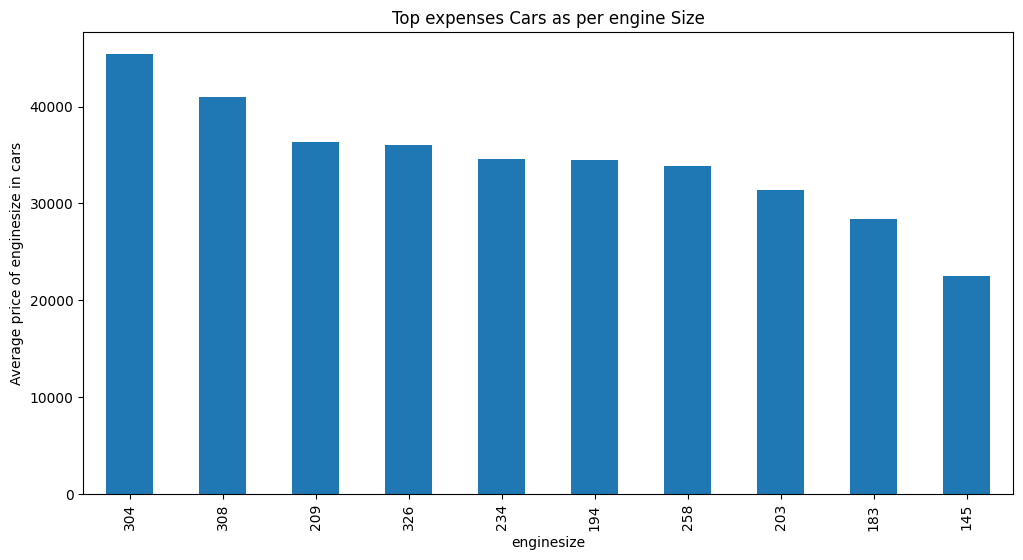

In [74]:
df.groupby("enginesize")["price"].mean().sort_values(ascending =False).head(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Average price of enginesize in cars",\
                                                title = "Top expenses Cars as per engine Size")

<Axes: title={'center': 'Bottom expenses Cars as per engine Size'}, xlabel='enginesize', ylabel='Average price of enginesize in cars'>

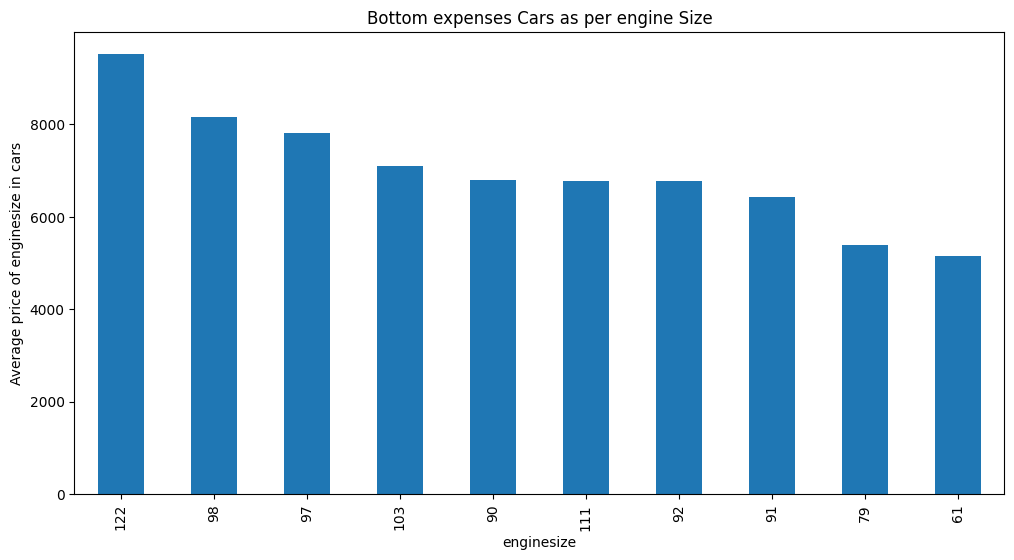

In [75]:
df.groupby("enginesize")["price"].mean().sort_values(ascending =False).tail(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Average price of enginesize in cars",\
                                                title = "Bottom expenses Cars as per engine Size")

# Cars Horsepower analysis

<Axes: title={'center': 'Top count of Horsepower Size in Cars'}, xlabel='horsepower', ylabel='Count of horsepower in cars'>

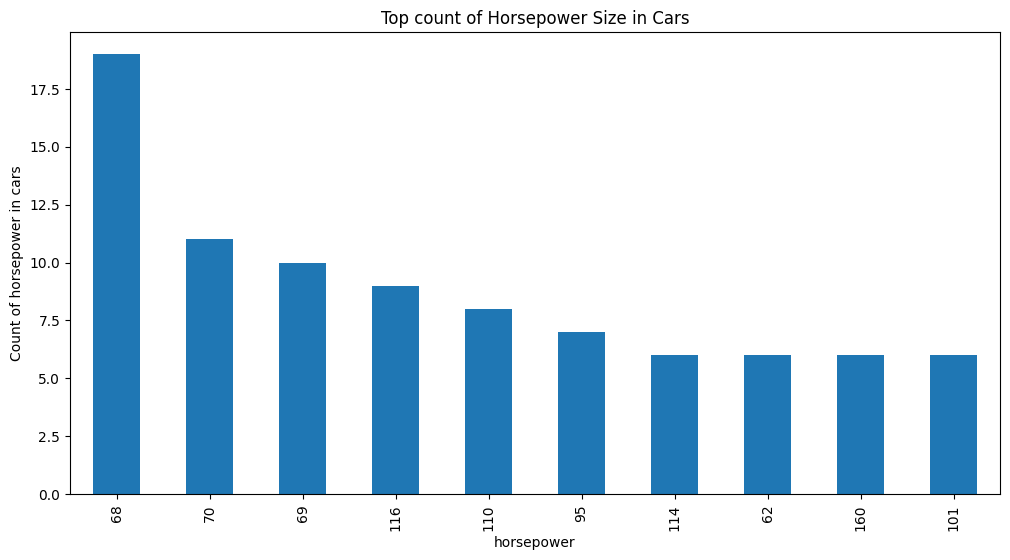

In [76]:
df.groupby("horsepower")["car_company"].count().sort_values(ascending =False).head(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Count of horsepower in cars",\
                                                title = "Top count of Horsepower Size in Cars")

<Axes: title={'center': 'Top expenses cars as per horsepower capacity'}, xlabel='horsepower', ylabel='Average price cars per horsepower'>

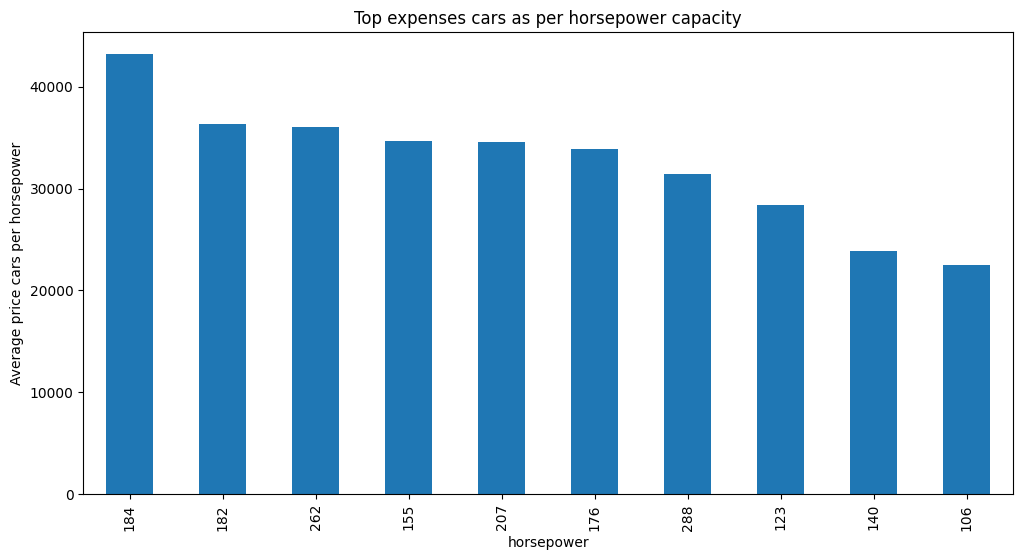

In [77]:
df.groupby("horsepower")["price"].mean().sort_values(ascending =False).head(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Average price cars per horsepower",\
                                                title = "Top expenses cars as per horsepower capacity")

<Axes: title={'center': 'Bottom expenses cars with horsepower capacity'}, xlabel='horsepower', ylabel='Average price cars per horsepower'>

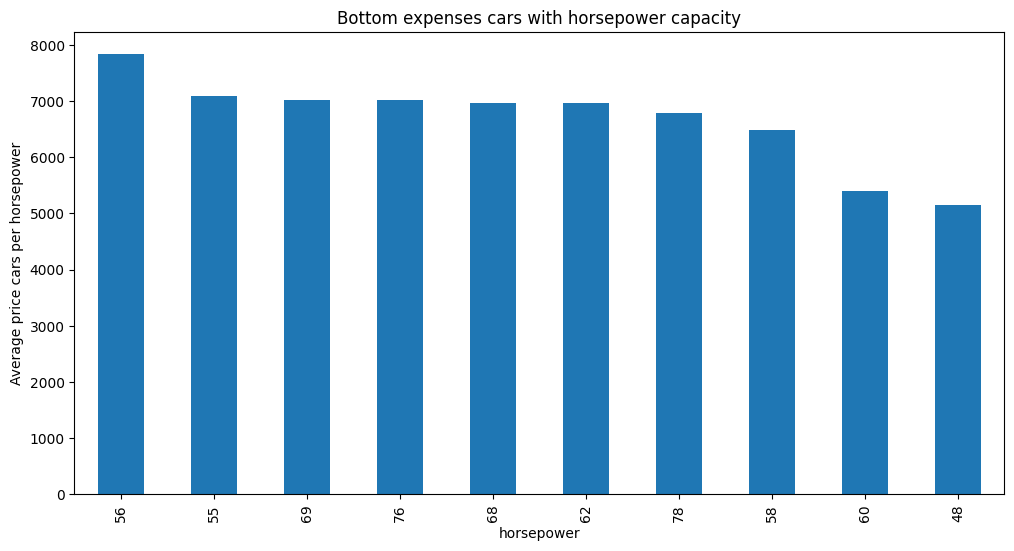

In [78]:
df.groupby("horsepower")["price"].mean().sort_values(ascending =False).tail(10).plot(kind = "bar", \
                        figsize = (12,6), ylabel = "Average price cars per horsepower",\
                                                title = "Bottom expenses cars with horsepower capacity")

#### From above charts it is clear that car with horsepower 68, 70, 69 repeated in market and these car are relative cheap as compared to other car with different horsepower capacity, comanies are more focus on cars with these horsepower capacity.

In [79]:
df.head()

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0          3      gas        std           2  convertible        rwd   
1          3      gas        std           2  convertible        rwd   
2          1      gas        std           2    hatchback        rwd   
3          2      gas        std           4        sedan        fwd   
4          2      gas        std           4        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc               4         130       mpfi       3.47    2.68   
1       dohc               4         130       mpfi       3.47    2.68   
2       ohcv               6         152       mpfi       2.68    3.47   
3        ohc               4         109       mpfi       3.19    3.40   
4        ohc               5         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   car_company  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi

# Conclution

#### 1- Most car model in US market are from Toyota company and least from Mercury.
#### 2- Median Price of gas vehicle is lower than diesel vehicles and 90% of car are gas fuel type.
#### 3- All vehicles have engines placed in the front of the vehicle and price of rear engine location cars are significant higher and 99% have front engine location.
#### 4 - Majority of car have high mileage and are cheaper than low mileage comes expensive cars may be sport and luxury cars.
#### 5 - Prices of two and four door vehicles are almost equal but majority of cars have two door vehicles and they also have some outlier in the price of two door vehicle, four door have shares of 56%.
#### 6- Majority of car in US have a risk rating on score of 0, 1 and car with these two rating have low prices
#### 7- Majority of car have 4 cylinder and price of cars are higher as per number of cylinder in car, 4 cyliner number car have 78% shares.
#### 8- 72% of vehicles have ohc enginetype and the car of ohc engine price are less.
#### 9- engine size 92, 97, 122 have highest number in market and 
#### available under low price cars.
#### 10- car with horsepower 68, 70, 69 repeated in market and these car are relative cheap as compared to other car with different #### horsepower capacity, comanies are more focus on cars with these horsepower capacity.


#### ** When Horsepower, engine size, number of cylinder increases car prices increases.


# Recommendation

#### 1- MPG and oil price have positive effect on auto price. It is intitutive that the higher MPG means Higher fuel economy, will lead the auto price to rise.
#### 2- Client should considered the magnitude of horsepower, number of cylinders, engine size as these facor have a positive relation with prices of car. Most market shares for car have horsepower of 68,70,69 and with four cylindernumber and engine sizes are 02, 97, 122.
#### 3- client should manufactur and price their car with symboling rating 1.
#### 4- Engine location make a huge impact on price on car, so client should considered location of engine while manufacturing and pricing.


#### Fuel Efficiency, followed by Safety and low price are most important for U.S consumer for a new car as per Statista Global consumer Survey, Link : https://www.statista.com/forecasts/997119/purchase-criteria-for-cars-in-the-us

